<a href="https://colab.research.google.com/github/mdnasiruddin733/ann-thesis/blob/main/ArtificialNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Steps to be follwed:**
> 

*   Import necessary packages
*   Load Data
*   Define Keras Model
*   Compile Keras Model
*   Fit Keras Model
*   Evaluate Keras Model
*   Make Predictions


















In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing necessary packages and modules**


In [50]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np


## **Loading data from our data.csv file** 

In [51]:
url="/content/drive/MyDrive/coxbazar-data.csv"
df=pd.read_csv(url)
print(df.shape)

(71, 5)


## **Splitting dataset into input and output columns** 

In [72]:

input_col=df.iloc[:,0:3]
output_col=df.iloc[:,3:5]

print(output_col)

    ll  pl
0   40  23
1   43  26
2   39  21
3   62  33
4   38  22
..  ..  ..
66  48  25
67  38  21
68  45  23
69  35  20
70  30  16

[71 rows x 2 columns]


# **Splitting Training and Testing Data**


In [73]:
x_train,x_test,y_train,y_test=train_test_split(input_col,output_col,test_size=0.20)

## **Defining and compiling keras model** 

In [74]:

#defining layers
model = Sequential()
model.add(Dense(units=30,kernel_initializer='normal', activation='relu'))
model.add(Dense(units=30,kernel_initializer='normal',activation="relu"))
model.add(Dense(units=30,kernel_initializer='normal',activation="relu"))
model.add(Dense(units=30,kernel_initializer='normal',activation="relu"))
model.add(Dense(2,activation="linear"))


# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mse"])
 
model.fit(x_train, y_train ,epochs = 1000, batch_size=60, verbose=0)
y_true = np.array(y_test)
y_pred = np.array(model.predict(x_test))
r2_score(y_true,y_pred)


0.6062334710066374

# **Predicting model**


In [76]:
df=pd.DataFrame()
df["sand"]=x_test['sand']
df["silt"]=x_test['silt']
df["clay"]=x_test['clay']
df["ll"]=y_test['ll']
df["predicted_ll"]=model.predict(x_test)[:,0]
df["pl"]=y_test['pl']
df["predicted_pl"]=model.predict(x_test)[:,1]

print(df)


    sand   silt   clay  ll  predicted_ll  pl  predicted_pl
6    2.3  60.76  36.95  48     48.325859  27     25.467869
70  27.3  49.77  22.94  30     36.133892  16     19.073515
63  14.0  36.46  49.54  54     47.587925  20     25.075504
22   2.2  56.58  41.22  43     49.625832  24     26.148239
57   3.1  62.94  33.96  48     47.130604  24     24.841908
45  39.4  40.06  20.54  37     35.429108  16     18.696404
23  15.3  52.24  32.45  49     42.022896  24     22.162392
51   6.3  82.70  11.00  41     39.136272  23     20.656507
11   0.5  48.30  51.20  59     53.232540  30     28.036680
31  24.4  38.04  37.56  33     40.067883  23     21.134470
26  23.8  54.82  21.39  33     36.529369  22     19.282526
41  34.1  55.94   9.96  40     36.735085  22     19.381681
8   19.0  41.91  39.09  54     42.582390  25     22.453262
65  65.1  26.03   8.87  23     34.505024  15     18.194231
62  25.8  62.84  11.37  36     37.240063  20     19.651598


**Graphs**


Text(0, 0.5, 'Plastic Limit')

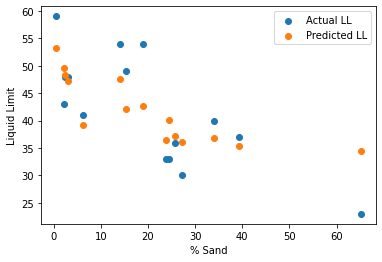

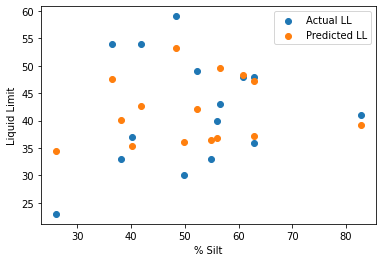

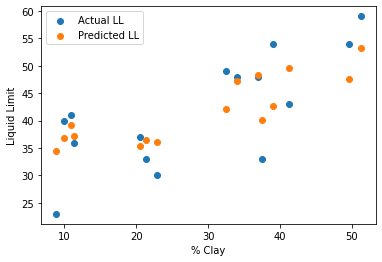

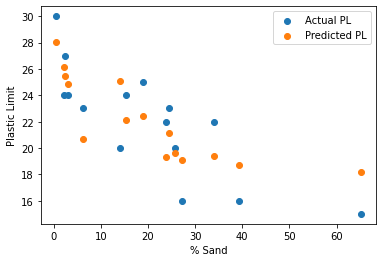

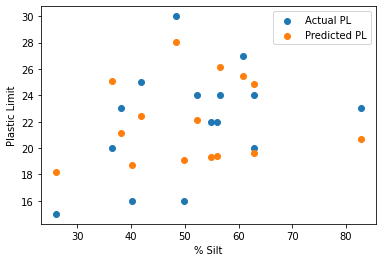

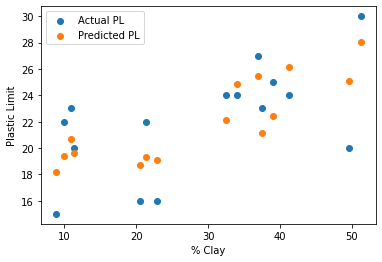

In [78]:
import matplotlib.pyplot as plt

fig1,sand=plt.subplots()
sand.scatter(df['sand'],df['ll'])
sand.scatter(df['sand'],df['predicted_ll'])
sand.legend(("Actual LL","Predicted LL"))
sand.set_xlabel("% Sand")
sand.set_ylabel("Liquid Limit")

fig2,silt=plt.subplots()
silt.scatter(df['silt'],df['ll'])
silt.scatter(df['silt'],df['predicted_ll'])
silt.legend(("Actual LL","Predicted LL"))
silt.set_xlabel("% Silt")
silt.set_ylabel("Liquid Limit")

fig3,clay=plt.subplots()
clay.scatter(df['clay'],df['ll'])
clay.scatter(df['clay'],df['predicted_ll'])
clay.legend(("Actual LL","Predicted LL"))
clay.set_xlabel("% Clay")
clay.set_ylabel("Liquid Limit")


# Plastic Limit
fig1,sand=plt.subplots()
sand.scatter(df['sand'],df['pl'])
sand.scatter(df['sand'],df['predicted_pl'])
sand.legend(("Actual PL","Predicted PL"))
sand.set_xlabel("% Sand")
sand.set_ylabel("Plastic Limit")

fig2,silt=plt.subplots()
silt.scatter(df['silt'],df['pl'])
silt.scatter(df['silt'],df['predicted_pl'])
silt.legend(("Actual PL","Predicted PL"))
silt.set_xlabel("% Silt")
silt.set_ylabel("Plastic Limit")

fig3,clay=plt.subplots()
clay.scatter(df['clay'],df['pl'])
clay.scatter(df['clay'],df['predicted_pl'])
clay.legend(("Actual PL","Predicted PL"))
clay.set_xlabel("% Clay")
clay.set_ylabel("Plastic Limit")


